In [314]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import random
from flax.training import train_state

import pandas as pd
import matplotlib.pyplot as plt

# RELOADING MODULES
import importlib
import neural_net_jax
importlib.reload(neural_net_jax)
NeuralODE = neural_net_jax.NeuralODE

In [315]:
t_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/X_train.csv'), dtype=jnp.float32)) # x is timepoints t
t_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/X_test.csv'), dtype=jnp.float32))

Y_train = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/train/y_train.csv'))) 
Y_test = jnp.squeeze(jnp.array(pd.read_csv('../data/daily_climate/test/y_test.csv'))) # y is the mean temperature

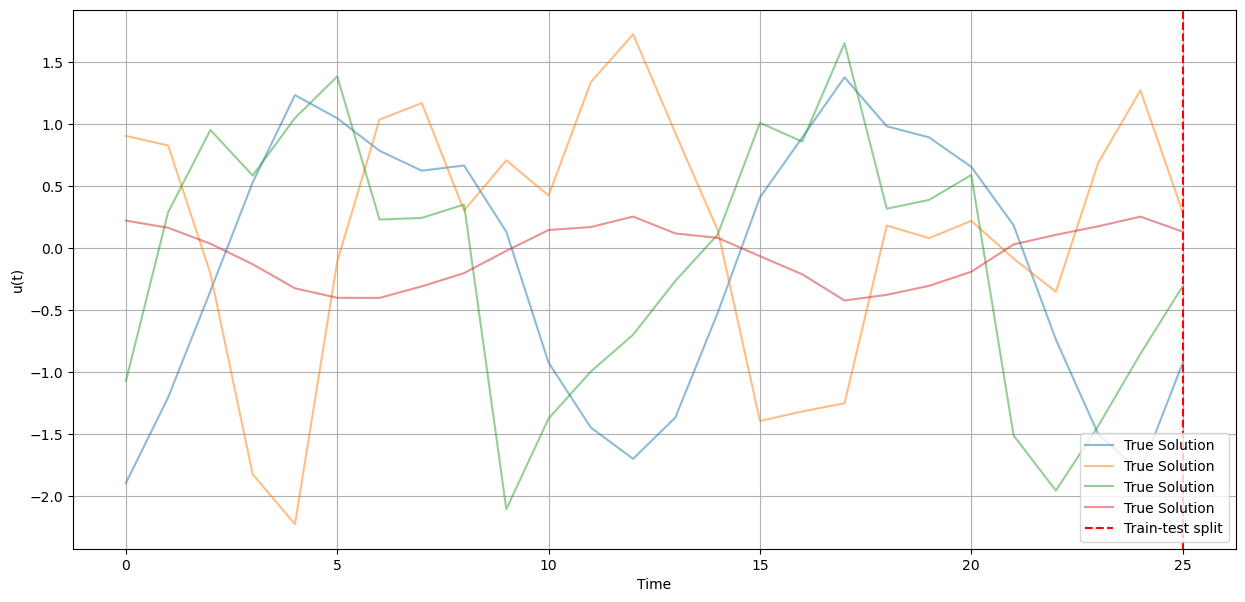

In [316]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train, Y_train, label='True Solution', alpha = 0.5)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()

In [317]:
rng = random.PRNGKey(0)
learning_rate = 0.001

layer_widths = [5, 64, 32, 32, 1]

model = NeuralODE(layer_widths, time_invariant=False)
state = model.create_train_state(rng, learning_rate)

In [318]:
print(len(t_train))
n = int(len(t_train)/10)

26


In [325]:
y_train = Y_train[:,0]
x_train = Y_train[:,1:]
print(y_train.shape)
print(x_train.shape)

y_test = Y_test[:,0]
x_test = Y_test[:,1:]

(26,)
(26, 3)


In [323]:
k_list = [1, 2, 4, 6, 8]
for k in k_list:
    print(k)
    print(n*k/len(t_train))    
    state = model.train(state, t_train[:n*k], y_train[:n*k], y_train[0], loss = 0.1, extra_args=x_train[:n*k])

state = model.train(state, t_train, y_train, y_train[0], loss = 0.1, extra_args = x_train)

1
0.07692307692307693
2
0.15384615384615385
4
0.3076923076923077
6
0.46153846153846156
8
0.6153846153846154
Epoch 100, Loss: 0.21064364910125732


In [324]:
y_train_pred = model.neural_ode(state.params, y_train[0], t_train, state, x_train)
y_test_pred = model.neural_ode(state.params, y_test[0], t_test, state, x_test)

TypeError: neural_ode() missing 1 required positional argument: 'args'

In [313]:
Y_train[:,0].shape

(26,)

In [167]:
t_train.shape

(26,)

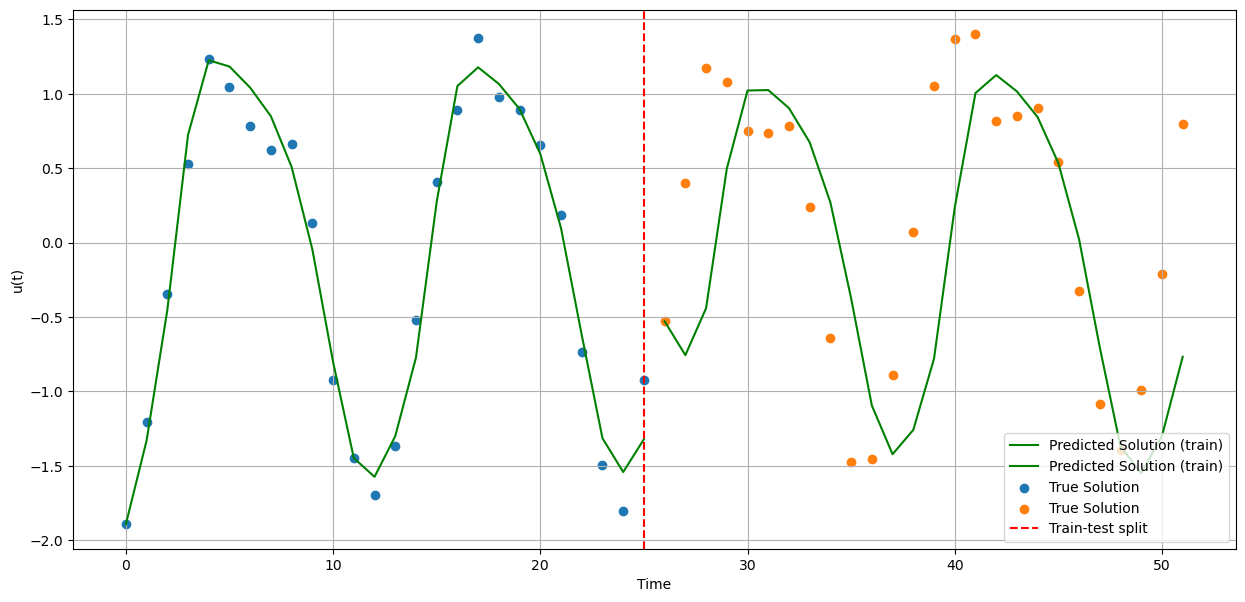

In [170]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))
plt.plot(t_train, y_train_pred[:,0], 'g', label='Predicted Solution (train)')
plt.plot(t_test, y_test_pred[:,0], 'g', label='Predicted Solution (train)')
#plt.plot(t_test, y_test_pred, 'r', label='Predicted Solution (test)')
plt.scatter(t_train, Y_train[:,0], label='True Solution', alpha = 1)
plt.scatter(t_test, Y_test[:,0], label='True Solution', alpha = 1)

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.axvline(x=t_train[-1], color='r', linestyle='--', label='Train-test split')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()